In [162]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models
from PIL import Image
from scipy import ndimage
import random

In [163]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [118]:
dataset_main_path = '/content/gdrive/MyDrive/APS360/Project/chestxray_sample_dataset'

In [164]:
def load_data(path):
  np.random.seed(1000) 
  batchSize = 1

  #Ensuring data is a 224x224 image using resize function
  transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])
    
  sample_set = torchvision.datasets.ImageFolder(path, transform=transform)
  sample_loader = torch.utils.data.DataLoader(sample_set, batch_size=batchSize, 
                                              shuffle=True)
  
  return sample_loader

In [165]:
sample_loader = load_data(dataset_path)
print(len(sample_loader))

40


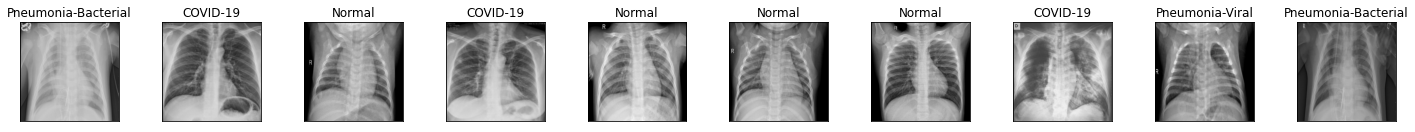

In [166]:
classes = ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']

k=0
dataiter = iter(sample_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for images, labels in sample_loader:
    
    ax = fig.add_subplot(2, 20/2, k+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[0], (1, 2, 0)))
    ax.set_title(classes[labels[0]])
    k += 1
    if k > 9:
        break

In [138]:
#Add noise to an image
def add_noise(image):
  np.random.seed(1000) 
  mean = 0.0   # some constant
  std = random.uniform(0.08,0.18) # some constant (standard deviation)   
  noisy_image = image + np.random.normal(mean, std, image.shape)
  noisy_image_clipped = np.clip(noisy_image, 0, 255)
  return noisy_image

In [167]:
dataiter = iter(sample_loader)
images, labels = dataiter.next()
image = np.transpose(images[0], (1, 2, 0))
label = classes[labels[0]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Pneumonia-Bacterial with Noise')

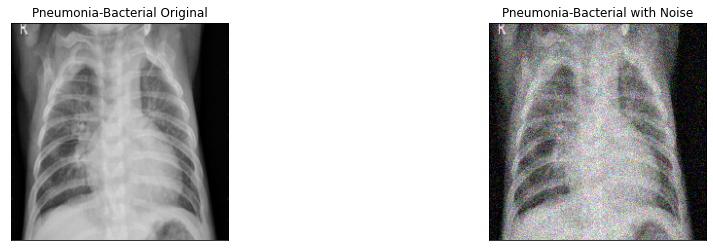

In [168]:
fig = plt.figure(figsize=(50, 4))
ax = fig.add_subplot(1, 6, 1, xticks=[], yticks=[])
plt.imshow(image)
ax.set_title(label+' Original')

ax = fig.add_subplot(1, 6, 2, xticks=[], yticks=[])
noisy_image = add_noise(image)
plt.imshow(noisy_image)
ax.set_title(label+' with Noise')

In [147]:
#Save the noisy images into the correct labelled folders
def save_noisy_images(loader):
    # Extract features from small data
    for img, label in loader:
        noisy_image = addNoise(img)
        torchvision.utils.save_image(noisy_image[0], dataset_path + '/' + str(classes[label]) + '/' + str(classes[label]) + '_Noise_' + str(n) + '.jpg')
        n+=1
        if n > 3:
            break